In [35]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [36]:
# reading the csv file & creating the dataframe
df = pd.read_csv('cleaned.csv')
df.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [37]:
df.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [39]:
df.shape

(45166, 12)

In [40]:
df.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

In [41]:
df.isna().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

In [42]:
df.describe()

,item_id,user_id,rating,timestamp,year,month,quantity,unitprice,amount
count,45166.000000,4.516600e+04,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000
mean,3455.669574,4.846225e+05,4.218594,42077.370743,2014.710136,6.387902,7.490878,7491.027587,56118.889032
std,2485.219357,3.302487e+05,1.221118,816.969504,2.264562,3.598405,1.707673,1441.977833,16924.053525
min,1.000000,2.800000e+01,1.000000,36692.000000,2000.000000,1.000000,5.000000,5000.000000,25000.000000
25%,1518.000000,1.969772e+05,4.000000,41802.000000,2014.000000,3.000000,6.000000,6239.000000,43098.250000
50%,2881.000000,4.410355e+05,5.000000,42219.000000,2015.000000,6.000000,7.000000,7480.000000,54243.000000
75%,5178.000000,7.579805e+05,5.000000,42594.000000,2016.000000,10.000000,9.000000,8735.000000,67760.000000
max,9551.000000,1.157632e+06,5.000000,43374.000000,2018.000000,12.000000,10.000000,10000.000000,100000.000000


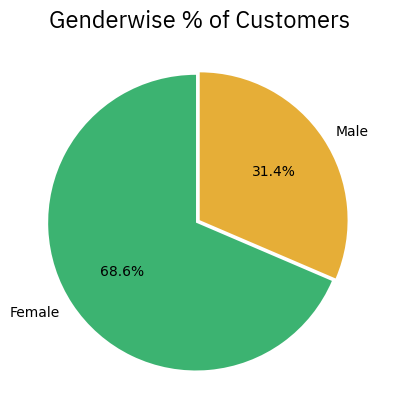

In [43]:
# Gender wise % of Customers
gender_count = df['gender'].value_counts()

plt.pie(gender_count, autopct='%1.1f%%', labels=gender_count.index, startangle=90, colors=['mediumseagreen', '#e6ae37'], explode=[0.03, 0])
plt.title('Genderwise % of Customers', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
plt.show()


**Conclusion:**
As we can see, Female customers' participiation is overwhelmingly greater than Male. So the company needs to target on Male customers because there's a opportunity for growth.

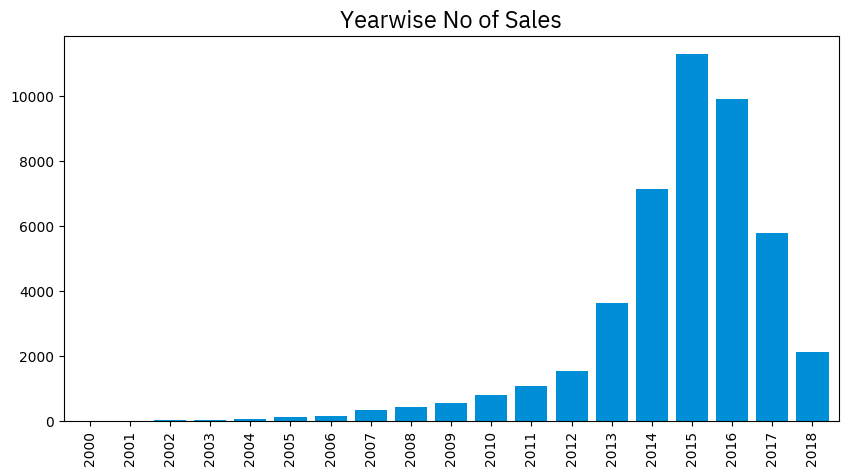

In [44]:
yearwise_no_of_sales = df['year'].value_counts(sort=False)
plt.figure(figsize=(10, 5))
fig = yearwise_no_of_sales.plot(kind='bar', xlabel='', color='#008fd6', width=0.8)
fig.set_title('Yearwise No of Sales', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
fig.grid(False)
plt.show()

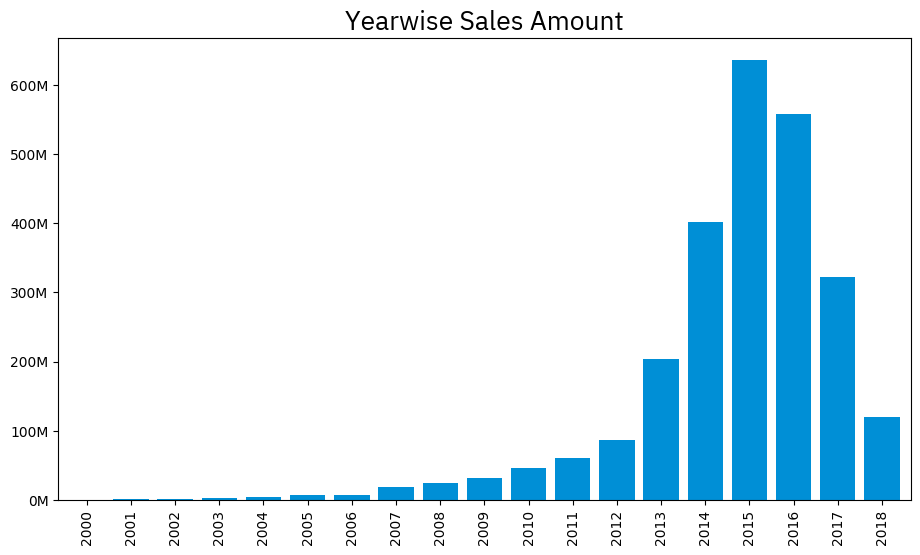

In [45]:
yearwise_sales_amount = df.groupby('year')['amount'].sum()

plt.figure(figsize=(11, 6))
fig = yearwise_sales_amount.plot(kind='bar', xlabel='', color='#008fd6', width=0.8)
fig.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
fig.set_title('Yearwise Sales Amount', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})
fig.grid(False)
plt.show()

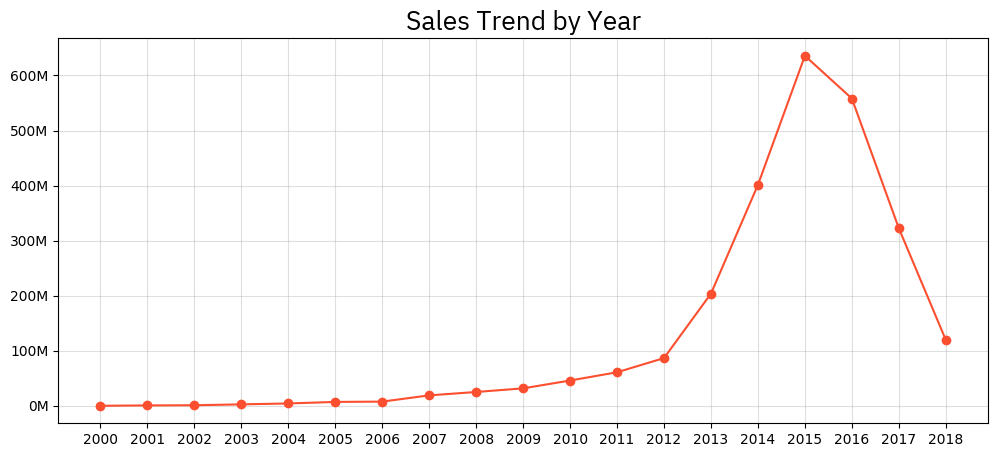

In [46]:
sales_by_year = df.groupby('year')['amount'].sum()

plt.figure(figsize=(12, 5))
fig = sales_by_year.plot(kind='line', xlabel='', marker='o', color='#fc4f30')
fig.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
fig.set_xticks(sales_by_year.index.astype(int))

# xticks = np.arange(sales_by_year.index.min(), sales_by_year.index.max() + 1, 2)  # Example: every 2 years
# fig.set_xticks(xticks)
fig.set_title('Sales Trend by Year', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})
fig.grid(True, alpha=0.4)
plt.show()

**Conslusion:**

As we can see 2000-2011, the growth wasn't that much. But since 2012, the sales the increased exponentinally and peaked at 2015. But then it started to decline and never recovered.

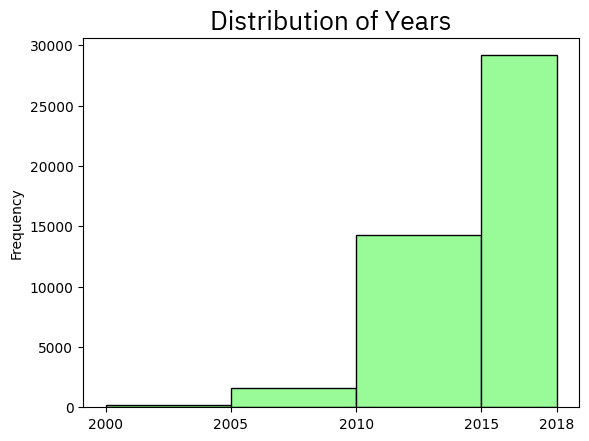

In [47]:
yearwise_count = df['year']
yearwise_histogram = yearwise_count.plot(kind='hist', bins=[2000, 2005, 2010, 2015, 2018], color='Palegreen', edgecolor='black')
yearwise_histogram.set_xticks([2000, 2005, 2010, 2015, 2018])
yearwise_histogram.set_title('Distribution of Years', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})
plt.show()

From the above histogram, we can observe, most of puchases had been done after the 2010. 

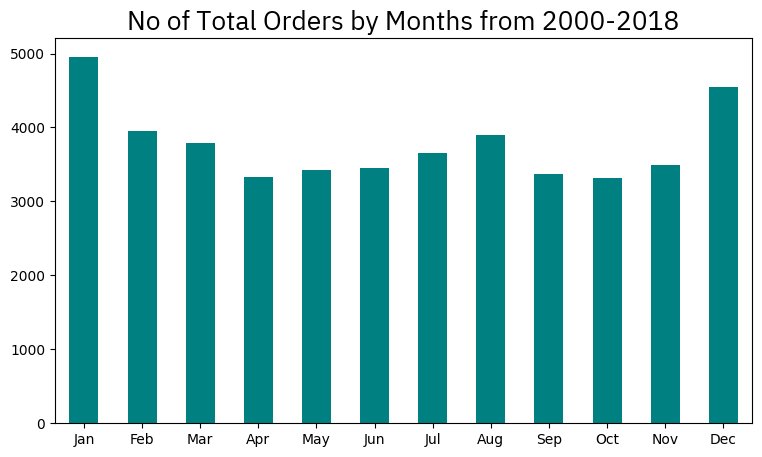

In [48]:
orders_sold_by_month = df.groupby('month')['amount'].count()

plt.figure(figsize=(9,5))
fig = orders_sold_by_month.plot(kind='bar', color='teal', xlabel='')
fig.set_title('No of Total Orders by Months from 2000-2018', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})
fig.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

**Conclusion:** 
From the above figure, we can make a conclusion that January has the highest sales followed by December. After Jan, the sales started dropping until April, after that sales started to increased upto August and again it declined until November.

So during the summer and winter, there could have some sales or offers that time.

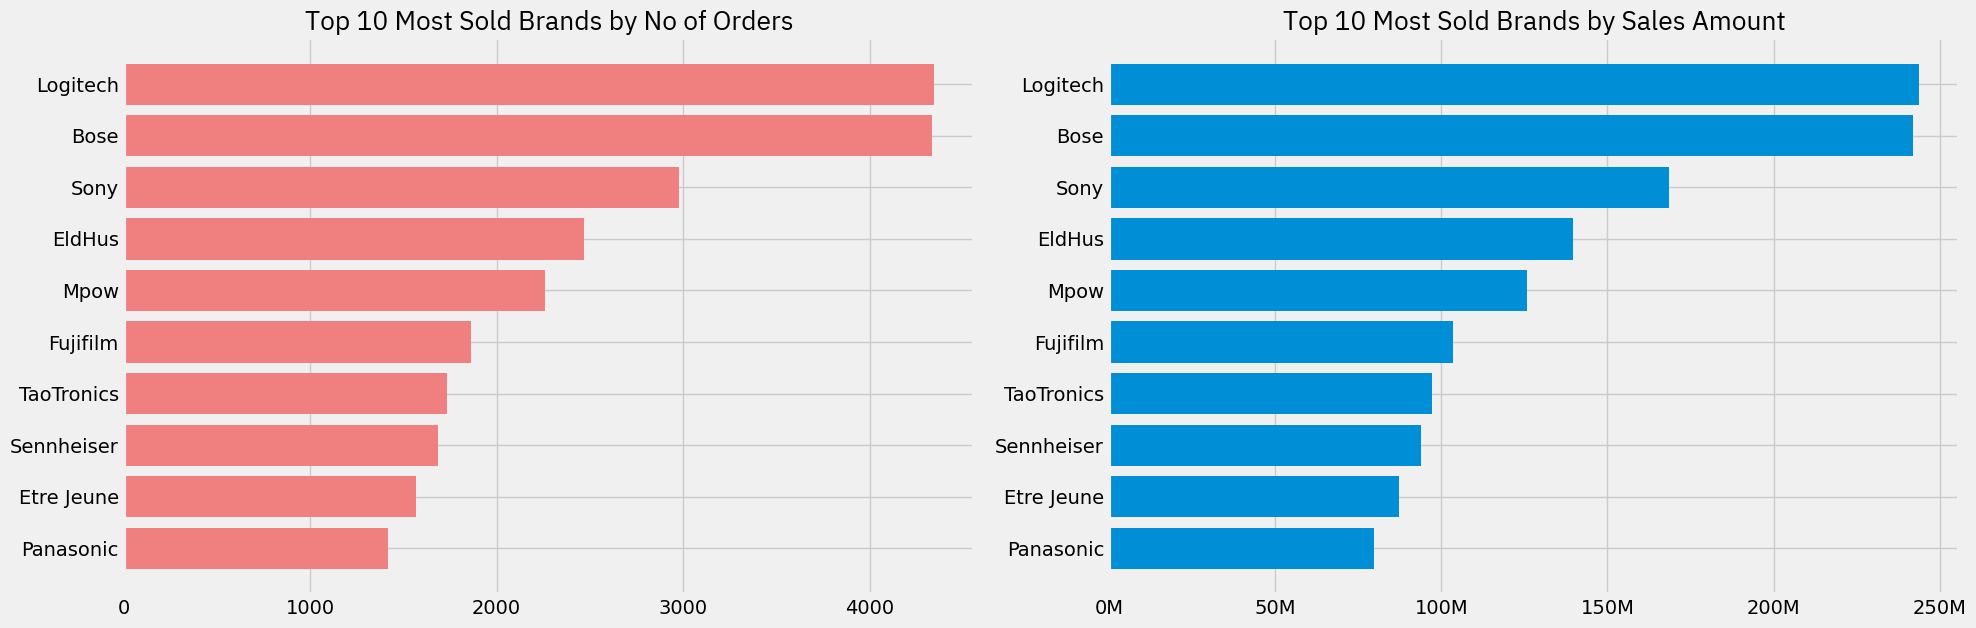

In [61]:
fig, axs = plt.subplots(1,2, figsize=(20, 6.5))

brands_by_count = df['brand'].value_counts().head(10).sort_values(ascending=True)
axs[0].barh(brands_by_count.index, brands_by_count, color='lightcoral')
axs[0].set_title('Top 10 Most Sold Brands by No of Orders', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})


brands_by_amount = df.groupby('brand')['amount'].sum().sort_values(ascending=True).tail(10)
axs[1].barh(brands_by_amount.index, brands_by_amount, color='#008fd6')
axs[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
axs[1].set_title('Top 10 Most Sold Brands by Sales Amount', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})

plt.tight_layout()
plt.show()

Top 5 brands by No of Order or Sales Amount are - .... 

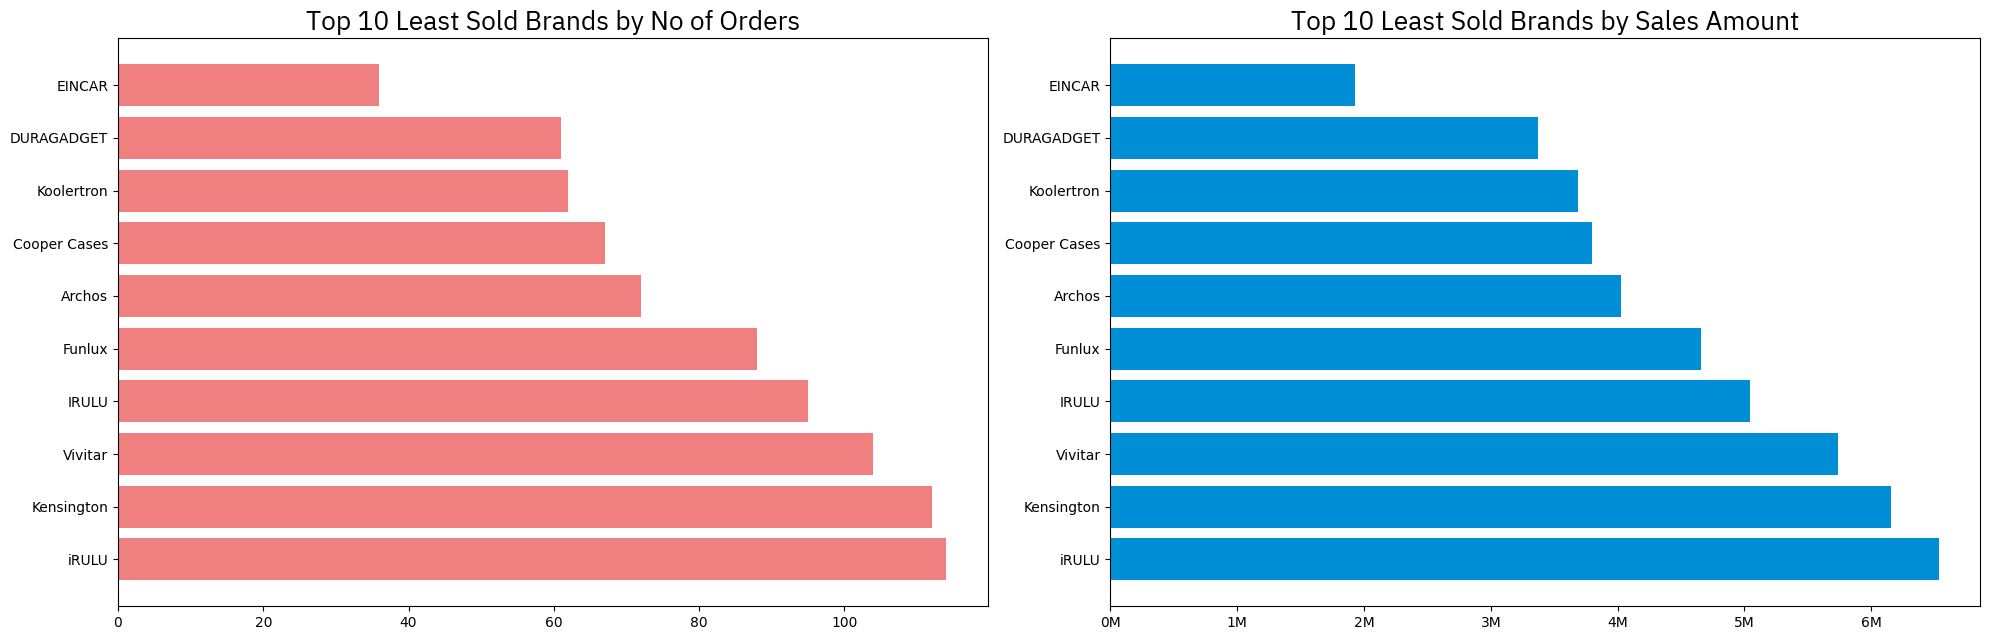

In [50]:
fig, axs = plt.subplots(1,2, figsize=(20, 6.5))

least_brands_by_count = df['brand'].value_counts().tail(10).sort_values(ascending=False)
axs[0].barh(least_brands_by_count.index, least_brands_by_count, color='lightcoral')
axs[0].set_title('Top 10 Least Sold Brands by No of Orders', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})


least_brands_by_amount = df.groupby('brand')['amount'].sum().sort_values().head(10).sort_values(ascending=False)
axs[1].barh(least_brands_by_amount.index, least_brands_by_amount, color='#008fd6')
axs[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
axs[1].set_title('Top 10 Least Sold Brands by Sales Amount', fontdict={'fontsize': 19, 'fontname': 'IBM Plex Sans'})

plt.tight_layout()
plt.show()

The least sold brands by no of orders or sales amount are EINCAR.

C:\Users\Subhajit Gorai\AppData\Local\Temp\ipykernel_3620\3416656539.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(categorywise_sales.index, rotation=90)


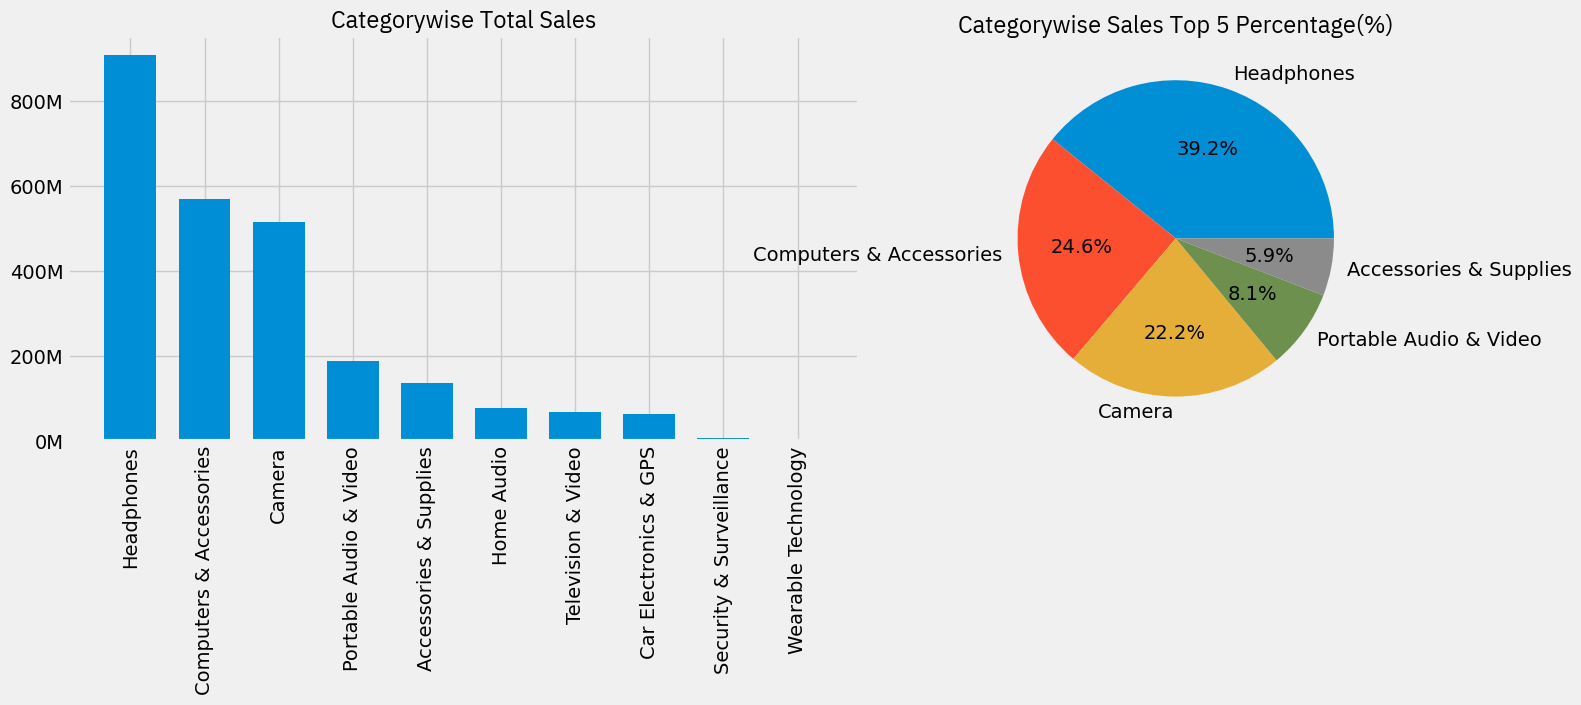

In [51]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios': [2, 1]})

categorywise_sales = df.groupby('category')['amount'].sum().sort_values(ascending=False)
axs[0].bar(categorywise_sales.index, categorywise_sales, color='#008fd6', width=0.7)
axs[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))
axs[0].set_title("Categorywise Total Sales", fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
axs[0].set_xticklabels(categorywise_sales.index, rotation=90)



category_share = df.groupby('category')['amount'].sum().sort_values(ascending=False).head()
axs[1].pie(category_share, autopct='%1.1f%%', labels=category_share.index, startangle=0)
axs[1].set_title('Categorywise Sales Top 5 Percentage(%)', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
plt.show()

Top 3 most sold categories - Headphones, Computers & Accessories and Camera
Top 3 least sold categories - Car electronics & GPS, Security & Surveillance and Wearable Technology.

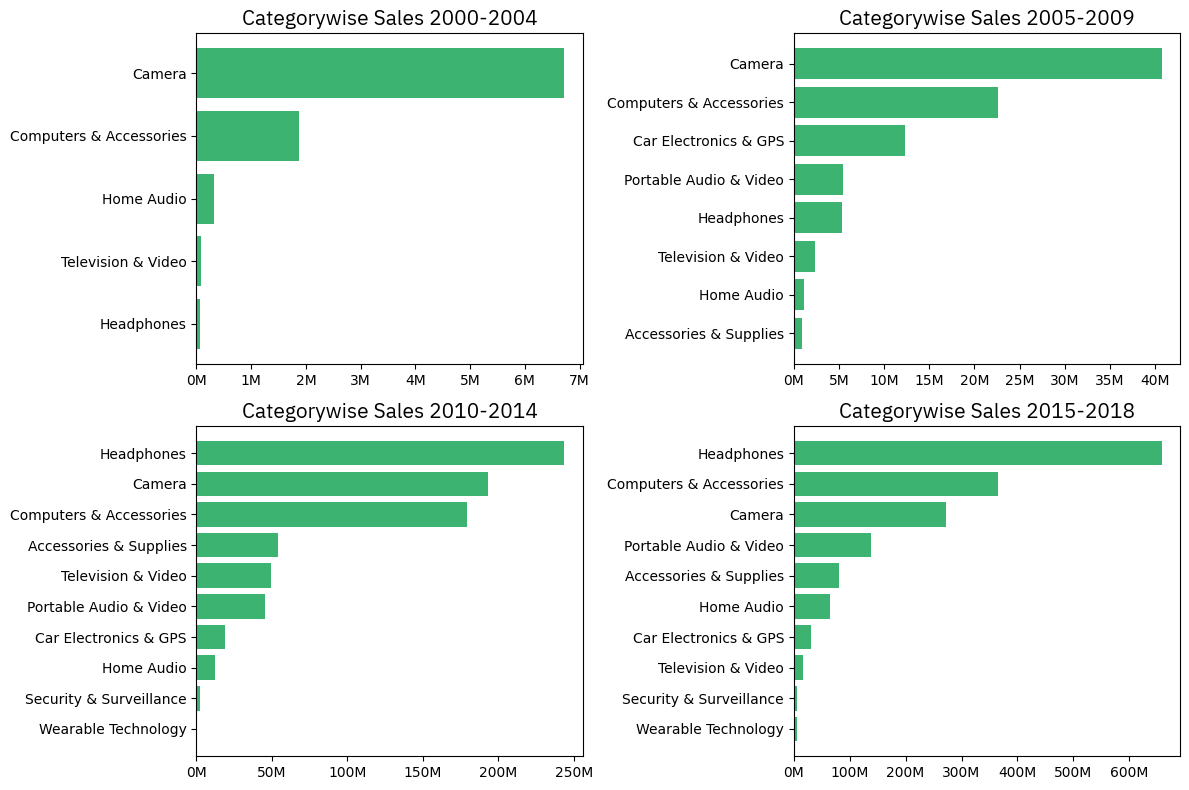

In [52]:
plt.style.use('default')
fig, axs = plt.subplots(2,2, figsize=(12,8))

categorywise_sales_2000_2004 = df[(df['year']>=2000) & (df['year']<=2004)].groupby('category')['amount'].sum().sort_values()
axs[0,0].barh(categorywise_sales_2000_2004.index, categorywise_sales_2000_2004, color='MediumSeaGreen')
axs[0,0].set_title('Categorywise Sales 2000-2004', fontdict={'fontsize': 15, 'fontname': 'IBM Plex Sans'})
axs[0,0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))


categorywise_sales_2005_2009 = df[(df['year']>=2005) & (df['year']<=2009)].groupby('category')['amount'].sum().sort_values()
axs[0,1].barh(categorywise_sales_2005_2009.index, categorywise_sales_2005_2009, color='MediumSeaGreen')
axs[0,1].set_title('Categorywise Sales 2005-2009', fontdict={'fontsize': 15, 'fontname': 'IBM Plex Sans'})
axs[0,1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))


categorywise_sales_2010_2014 = df[(df['year']>=2010) & (df['year']<=2014)].groupby('category')['amount'].sum().sort_values()
axs[1,0].barh(categorywise_sales_2010_2014.index, categorywise_sales_2010_2014, color='MediumSeaGreen')
axs[1,0].set_title('Categorywise Sales 2010-2014', fontdict={'fontsize': 15, 'fontname': 'IBM Plex Sans'})
axs[1,0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))


categorywise_sales_2015_2018 = df[df['year']>=2015].groupby('category')['amount'].sum().sort_values()
axs[1,1].barh(categorywise_sales_2015_2018.index, categorywise_sales_2015_2018, color='MediumSeaGreen')
axs[1,1].set_title('Categorywise Sales 2015-2018', fontdict={'fontsize': 15, 'fontname': 'IBM Plex Sans'})
axs[1,1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

plt.tight_layout()
plt.show()

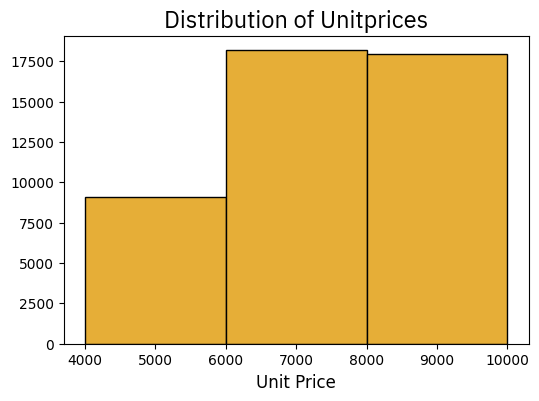

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(x=df['unitprice'], bins=[4000, 6000, 8000, 10000], color='#e6ae37', edgecolor='k')

ax.set_title('Distribution of Unitprices', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
ax.set_xlabel('Unit Price', fontsize=12)

plt.show()

Most of the product's unitprices are more than 6000.

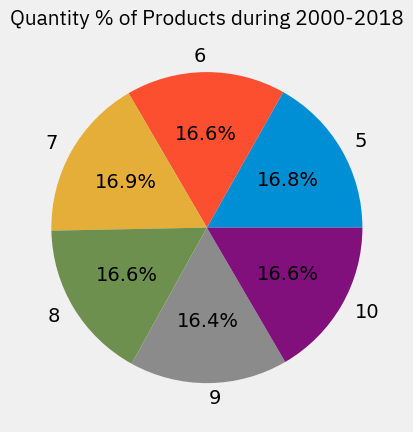

In [54]:
plt.style.use('fivethirtyeight')
quantity_share = df['quantity'].value_counts().sort_index().plot(kind='pie', ylabel='', autopct='%1.1f%%')
quantity_share.set_title('Quantity % of Products during 2000-2018', fontdict={'fontsize': 15, 'fontname': 'IBM Plex Sans'})
plt.show()

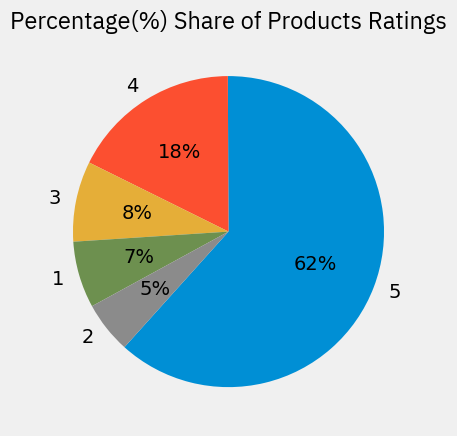

In [55]:
ratings_share = df['rating'].value_counts().plot(kind='pie', autopct='%1.0f%%', startangle=228, ylabel='')
ratings_share.set_title('Percentage(%) Share of Products Ratings', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
plt.show()

Almost 80% orders have been rated 4 & 5 by customers. So ie customers are satisfied with their product. 

We have to continue this momemtum and also focus on the rest 20% customers like what kindof problem their facing, why exactly they aren't happy with their product.

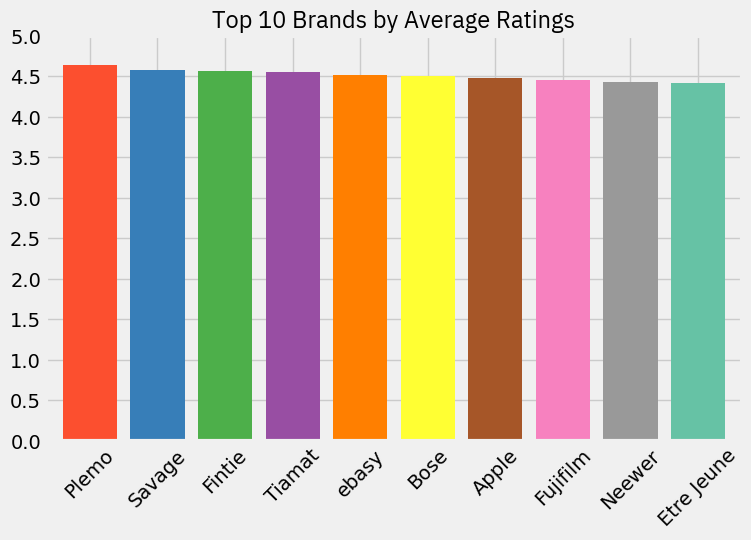

In [56]:
plt.figure(figsize=(8,5))
colors = ['#fc4f2f', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', '#66c2a5']
brandwise_ratings = df.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10)
fig = brandwise_ratings.plot(kind='bar', color=colors, width=0.8, xlabel='')
fig.set_title('Top 10 Brands by Average Ratings', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
fig.set_yticks(np.arange(0, 5.5, 0.5))
fig.set_xticklabels(brandwise_ratings.index, rotation=45)
fig.grid(True)
plt.show()

Plemo, Savage, Fintie have the highest average rating.

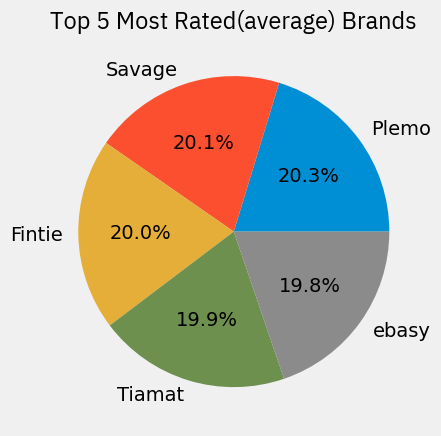

In [57]:

brand_share = df.groupby('brand')['rating'].mean().sort_values(ascending=False).head()
fig = brand_share.plot(kind='pie', autopct='%1.1f%%', ylabel='', labels=brand_share.index)
fig.set_title('Top 5 Most Rated(average) Brands', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
plt.show()

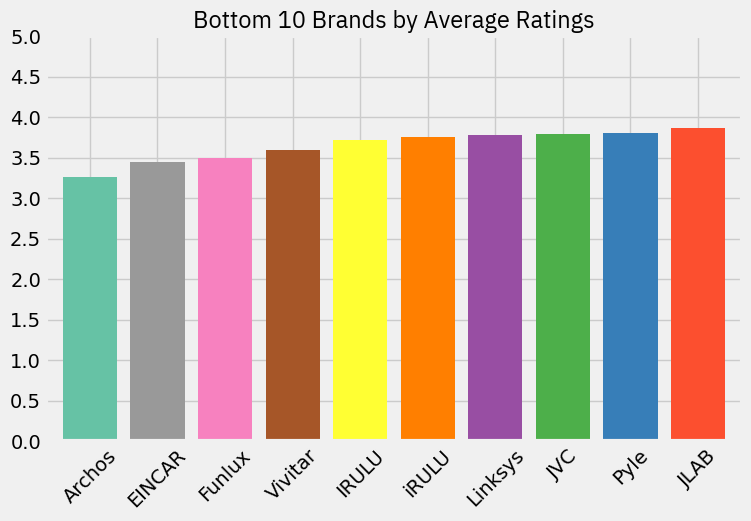

In [58]:
plt.figure(figsize=(8,5))
colors = ['#fc4f2f', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999', '#66c2a5']
colors.reverse()
bottom_brandwise_ratings = df.groupby('brand')['rating'].mean().sort_values().head(10)
fig = bottom_brandwise_ratings.plot(kind='bar', color=colors, width=0.8, xlabel='')
fig.set_title('Bottom 10 Brands by Average Ratings', fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
fig.set_yticks(np.arange(0, 5.5, 0.5))
fig.set_xticklabels(bottom_brandwise_ratings.index, rotation=45)
fig.grid(True)
plt.show()

Archos is the brand with least average rating followed by EINCAR, Funlux.

C:\Users\Subhajit Gorai\AppData\Local\Temp\ipykernel_3620\2132266009.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x=top_categorywise_ratings.index, y=top_categorywise_ratings.values, palette='crest_r')
C:\Users\Subhajit Gorai\AppData\Local\Temp\ipykernel_3620\2132266009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(top_categorywise_ratings.index, rotation=45, fontsize=10)


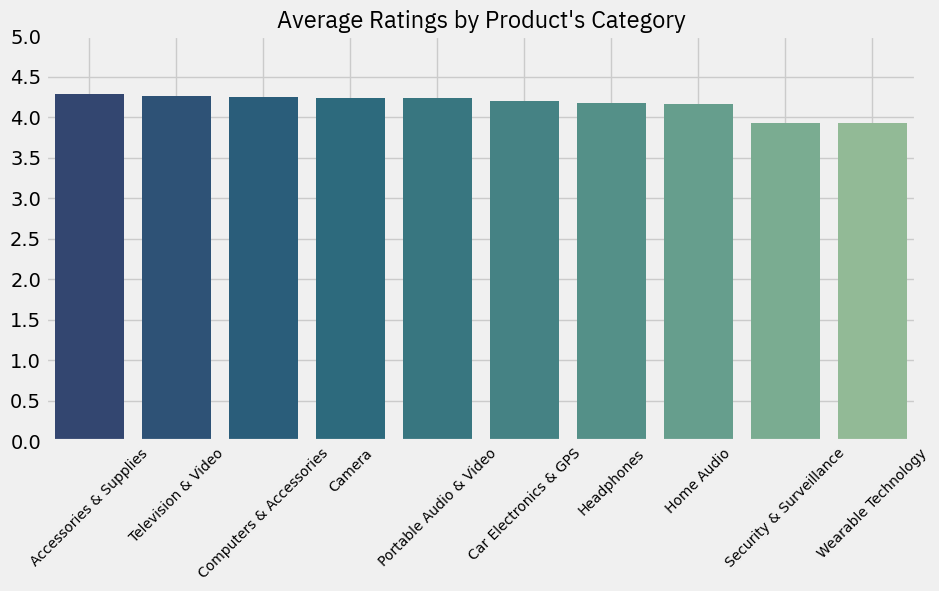

In [59]:
plt.figure(figsize=(10,5))
top_categorywise_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)
fig = sns.barplot(x=top_categorywise_ratings.index, y=top_categorywise_ratings.values, palette='crest_r')
fig.set_title("Average Ratings by Product's Category", fontdict={'fontsize': 17, 'fontname': 'IBM Plex Sans'})
fig.set_yticks(np.arange(0, 5.5, 0.5))
fig.set_xticklabels(top_categorywise_ratings.index, rotation=45, fontsize=10)
fig.set_xlabel('')
fig.grid(True)
plt.show()

Accessories & Supplies have the highest average rating in all categories and wearable technologies have the least.

### **Conclusion:**
1. As we can see, Female customers' participiation is overwhelmingly greater than Male. So the company needs to target on Male customers because there's a opportunity for growth.

2. During 2000-2011, the growth wasn't that much. But since 2012, the sales the increased exponentinally and peaked at 2015. But then it started to decline and never recovered. 

3. From the histogram, we can observe, most of purchases had been done after the 2010. 

4. January has the highest sales followed by December during 2000-2018. After Jan, the sales started dropping until April, after that sales started to increased upto August and again it declined until November. So during the summer and winter, there could have some sales or offers that time which might be reason behind sales growth.

5. The least sold brands by no of orders or sales amount are EINCAR.

6. Top 3 most sold categories - Headphones, Computers & Accessories and Camera. Top 3 least sold categories - Car electronics & GPS, Security & Surveillance and Wearable Technology.

7. Most of the product's unitprices are more than 6000.

8. Almost 80% orders have been rated 4 & 5 by customers. So that means customers are satisfied with their product. We have to continue this momemtum and also focus on the rest 20% customers like what kindof problem their facing, why exactly they aren't happy with their product.

9. Plemo, Savage, Fintie have the highest average rating.

10. Archos is the brand with least average rating followed by EINCAR, Funlux.

11. Accessories & Supplies has the highest average rating in all categories and Wearable Technologies has the least.

